## FINAL DEMO

In [2]:
import pandas as pd
from functions import *

df_final_demo = pd.read_csv("df_final_demo.csv")

df_final_demo.head()
df_final_demo.dropna(inplace=True)

mapGenre = {'X' : 'U'}
df_final_demo["gendr"] = replace_values_df(df_final_demo["gendr"], mapGenre)

## WEB DATA

In [3]:
df_web_data1 = pd.read_csv("df_final_web_data_pt_1.csv")
df_web_data2 = pd.read_csv("df_final_web_data_pt_2.csv")

df_web_data_concat = pd.concat([df_web_data1, df_web_data2], axis=0, join='inner')

In [4]:
# Convert type object into datetime 

df_web_data_concat['date_time'] = convert_to_dateTime(df_web_data_concat['date_time'])

df_web_data_concat.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [5]:
# I turn 'step' into a discrete numeric df

map_values = {'start' : 0, 'step_1' : 1, 'step_2' : 2, 'step_3' : 3, 'confirm' : 4}

df_web_data_concat["process_step"] = replace_values_df(df_web_data_concat["process_step"], map_values)

## FINAL EXP

In [6]:
df_final_exp = pd.read_csv("df_final_experiment_clients.csv")
df_final_exp.rename(columns={"Variation" : "variation"}, inplace=True)

In [7]:
df_final_exp = drop_na_df(df_final_exp, "variation")

In [8]:
map_values2 = {'Control': 0, 'Test': 1}

df_final_exp["variation"] = replace_values_df(df_final_exp["variation"], map_values2)

## MERGE

In [9]:
df_temp1 = pd.merge(df_final_demo, df_web_data_concat, on='client_id', how='inner')

df_all = pd.merge(df_temp1, df_final_exp, on='client_id', how='inner')

In [10]:
df_all = df_all.drop("clnt_tenure_yr", axis=1)      # We don´t need this column because is derivative from clnt_tenure_mnth

In [11]:
df_all_no_duplicates = df_all.copy()
df_all_no_duplicates.drop_duplicates(subset="client_id", inplace=True)

# El datafram pero sin los duplicados

## QUITAMOS OUTLIERS DEL DF_ALL Y DEL QUE NO TIENE DUPLICADOS

In [12]:
df_all = outlier_slayer(df_all)

df_all_no_duplicates = outlier_slayer(df_all_no_duplicates)

# VER SI SON JOVENES O NO

In [13]:
df_all_no_duplicates["clnt_age"].describe()

count    34931.000000
mean        46.057213
std         15.322921
min         17.000000
25%         32.500000
50%         46.000000
75%         58.500000
max         96.000000
Name: clnt_age, dtype: float64

In [14]:
df_all["clnt_age"].mode()

0    59.5
Name: clnt_age, dtype: float64

<Axes: >

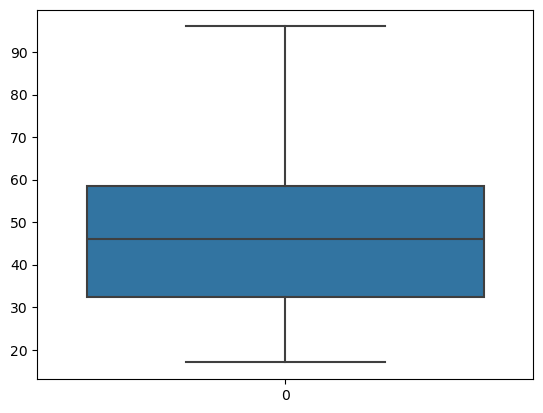

In [15]:
import seaborn as sns

sns.boxplot(data = df_all_no_duplicates['clnt_age'])

In [16]:
Q1 = df_all_no_duplicates['clnt_age'].quantile(0.25)
Q3 = df_all_no_duplicates['clnt_age'].quantile(0.75)
IQR = Q3 - Q1


inf_lim = Q1 - 1.5*IQR
sup_lim = Q3 + 1.5*IQR

inf_lim, sup_lim

(-6.5, 97.5)

In [17]:
# age_outliers = df_all_no_duplicates['clnt_age'][(df_all_no_duplicates['clnt_age'] < inf_lim) | (df_all_no_duplicates['clnt_age'] > sup_lim) ]

# age_outliers         # THERE ARE NO OUTLIERS ON Client Age column

# VER SI SON NUEVOS O ANTIGUOS

In [18]:
df_all_no_duplicates["clnt_tenure_mnth"].describe()

count    34931.000000
mean       137.713521
std         68.669962
min         33.000000
25%         79.000000
50%        123.000000
75%        181.000000
max        357.000000
Name: clnt_tenure_mnth, dtype: float64

In [19]:
df_all["clnt_tenure_mnth"].mode()

0    58.0
Name: clnt_tenure_mnth, dtype: float64

<Axes: >

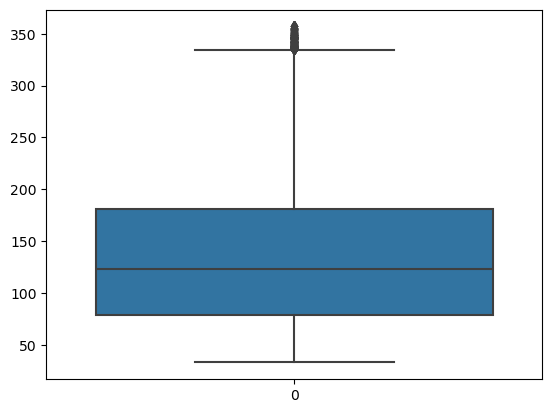

In [20]:
sns.boxplot(data = df_all_no_duplicates['clnt_tenure_mnth'])            # Seguimos teniendo outliers pero dar una segunda pasada es contraproducente en principio.

In [21]:
Q1 = df_all_no_duplicates['clnt_tenure_mnth'].quantile(0.25)
Q3 = df_all_no_duplicates['clnt_tenure_mnth'].quantile(0.75)
IQR = Q3 - Q1


inf_lim = Q1 - 1.5*IQR
sup_lim = Q3 + 1.5*IQR

inf_lim, sup_lim

(-74.0, 334.0)

# DIA 3  
## Calcular % de compras con éxito en cada web

In [22]:
df_all.sort_values(by="date_time", ascending=False)

,client_id,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation
118312,6187864,163.0,55.0,F,2.0,174412.75,4.0,7.0,113539532_90731779729,77393632_6804608909_354572,2,2017-06-20 23:57:06,0
118313,6187864,163.0,55.0,F,2.0,174412.75,4.0,7.0,113539532_90731779729,77393632_6804608909_354572,1,2017-06-20 23:56:30,0
118314,6187864,163.0,55.0,F,2.0,174412.75,4.0,7.0,113539532_90731779729,77393632_6804608909_354572,0,2017-06-20 23:56:17,0
189085,1558312,276.0,64.0,F,2.0,27918.86,2.0,5.0,397562195_28573798537,175513303_32086468382_224926,4,2017-06-20 23:26:00,0
230853,291330,349.0,68.0,M,2.0,62155.41,6.0,9.0,992344309_24884468623,91879336_25502670457_529422,1,2017-06-20 23:21:41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66072,4192640,174.0,54.0,M,2.0,97914.40,3.0,6.0,692067844_75217592829,706721307_85347845958_18583,0,2017-03-15 00:44:38,1
66073,4192640,174.0,54.0,M,2.0,97914.40,3.0,6.0,692067844_75217592829,706721307_85347845958_18583,1,2017-03-15 00:44:36,1
66074,4192640,174.0,54.0,M,2.0,97914.40,3.0,6.0,692067844_75217592829,706721307_85347845958_18583,2,2017-03-15 00:43:48,1
66075,4192640,174.0,54.0,M,2.0,97914.40,3.0,6.0,692067844_75217592829,706721307_85347845958_18583,1,2017-03-15 00:43:32,1


In [23]:
df_id_max_compras = df_all.groupby(["client_id", "visit_id", "variation"])["date_time"].idxmax()


In [24]:
df_ambos_portales = df_all.loc[df_id_max_compras]

In [25]:
df_control = df_ambos_portales[df_ambos_portales["variation"] == 0]

In [26]:
df_control_step_0 = df_control[df_control["process_step"] == 0]
df_control_step_1 = df_control[df_control["process_step"] == 1]
df_control_step_2 = df_control[df_control["process_step"] == 2]
df_control_step_3 = df_control[df_control["process_step"] == 3]
df_control_step_4 = df_control[df_control["process_step"] == 4]

In [27]:
perc_step0_control = 100 * df_control_step_0.shape[0] / df_control.shape[0]
perc_step1_control = 100 * df_control_step_1.shape[0] / df_control.shape[0]
perc_step2_control = 100 * df_control_step_2.shape[0] / df_control.shape[0]
perc_step3_control = 100 * df_control_step_3.shape[0] / df_control.shape[0]

perc_confirms_control = 100 * df_control_step_4.shape[0] / df_control.shape[0]


print(f"""
El % de gente que se quedó en el INICIO en la web de CONTROL es de {perc_step0_control}
El % de gente que se quedó en el PASO 1 en la web de CONTROL es de {perc_step1_control}
El % de gente que se quedó en el PASO 2 en la web de CONTROL es de {perc_step2_control}
El % de gente que se quedó en el PASO 3 en la web de CONTROL es de {perc_step3_control}
El % de gente que CONFIRMÓ la compra en la web de CONTROL es de {perc_confirms_control}
      """)


El % de gente que se quedó en el INICIO en la web de CONTROL es de 30.232025994233673
El % de gente que se quedó en el PASO 1 en la web de CONTROL es de 9.578508992723446
El % de gente que se quedó en el PASO 2 en la web de CONTROL es de 4.7366253260720335
El % de gente que se quedó en el PASO 3 en la web de CONTROL es de 7.372660290146904
El % de gente que CONFIRMÓ la compra en la web de CONTROL es de 48.080179396823944
      


In [28]:
df_test = df_ambos_portales[df_ambos_portales["variation"] == 1]

In [29]:
df_test_step_0 = df_test[df_test["process_step"] == 0]
df_test_step_1 = df_test[df_test["process_step"] == 1]
df_test_step_2 = df_test[df_test["process_step"] == 2]
df_test_step_3 = df_test[df_test["process_step"] == 3]
df_test_step_4 = df_test[df_test["process_step"] == 4]

In [30]:
perc_step0_test = 100 * df_test_step_0.shape[0] / df_test.shape[0]
perc_step1_test = 100 * df_test_step_1.shape[0] / df_test.shape[0]
perc_step2_test = 100 * df_test_step_2.shape[0] / df_test.shape[0]
perc_step3_test = 100 * df_test_step_3.shape[0] / df_test.shape[0]

perc_confirms_test = 100 * df_test_step_4.shape[0] / df_test.shape[0]

print(f"""
El % de gente que se quedó en el INICIO en la web de TEST es de {perc_step0_test}
El % de gente que se quedó en el PASO 1 en la web de TEST es de {perc_step1_test}
El % de gente que se quedó en el PASO 2 en la web de TEST es de {perc_step2_test}
El % de gente que se quedó en el PASO 3 en la web de TEST es de {perc_step3_test}
El % de gente que CONFIRMÓ la compra en la web de TEST es de {perc_confirms_test}
      """)


El % de gente que se quedó en el INICIO en la web de TEST es de 25.807860262008735
El % de gente que se quedó en el PASO 1 en la web de TEST es de 8.745533942040492
El % de gente que se quedó en el PASO 2 en la web de TEST es de 3.6244541484716155
El % de gente que se quedó en el PASO 3 en la web de TEST es de 4.958316792377928
El % de gente que CONFIRMÓ la compra en la web de TEST es de 56.86383485510123
      


In [31]:
df_ambos_portales

,client_id,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation
255392,555,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:34,1
9745,647,151.0,57.5,M,2.0,30525.80,0.0,4.0,66758770_53988066587,40369564_40101682850_311847,4,2017-04-12 15:47:45,1
83826,934,109.0,51.0,F,2.0,32522.88,0.0,3.0,810392784_45004760546,7076463_57954418406_971348,0,2017-04-18 02:38:52,1
284885,1186,99.0,22.0,U,2.0,31662.52,0.0,3.0,446844663_31615102958,507052512_11309370126_442139,0,2017-04-08 15:59:16,0
284882,1186,99.0,22.0,U,2.0,31662.52,0.0,3.0,446844663_31615102958,795373564_99931517312_810896,2,2017-04-08 18:05:24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208379,9998773,59.0,28.5,U,2.0,76988.65,2.0,5.0,481169437_1308863478,980310183_14300639078_417437,4,2017-04-12 23:50:22,1
43929,9998851,58.0,23.5,U,2.0,38473.54,3.0,6.0,660529049_81285947655,310744937_17135608286_213964,4,2017-04-05 12:08:43,1
27192,9998921,189.0,38.0,F,2.0,30644.10,4.0,7.0,960034051_85687824805,378424178_59565976155_8051,0,2017-04-18 11:26:31,0
194568,9999400,86.0,28.5,U,2.0,51787.04,0.0,3.0,915967319_19082377501,288904166_90826265353_276104,4,2017-04-20 05:23:27,1


In [32]:
# import matplotlib.pyplot as plt

# # Divide el DataFrame en función de la columna "variation"
# df_ambos_portales_grouped = df_ambos_portales.groupby('variation')

# # Crea un gráfico de barras para cada grupo
# for name, group in df_ambos_portales_grouped:
#     group['process_step'].value_counts().plot(kind='bar', alpha=0.5, color='blue', label=name)

# # Agrega título y etiquetas a los ejes
# plt.title('Número de veces que se repite cada valor en la columna "process_step"')
# plt.xlabel('Valor de "process_step"')
# plt.ylabel('Número de veces')
# plt.legend()

# # Muestra el gráfico
# plt.show()

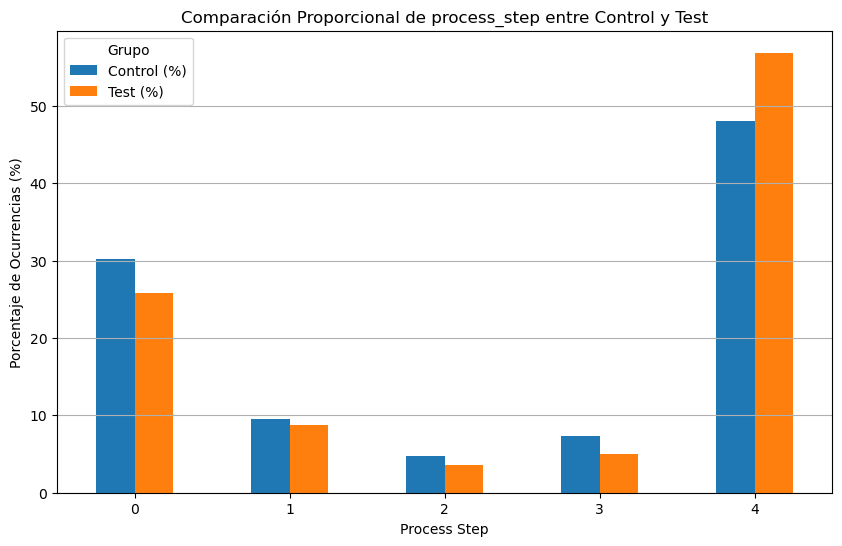

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar y normalizar las ocurrencias de process_step en cada DataFrame
control_counts = df_control['process_step'].value_counts(normalize=True).sort_index() * 100  
# normalize=True me permite obtener la proporcion. Si no, obtengo datos absolutos y al ser los dos df con distintos número de valores no puedo compararlos 
test_counts = df_test['process_step'].value_counts(normalize=True).sort_index() * 100  

# Crear un DataFrame para facilitar la comparación
counts_df = pd.DataFrame({'Control (%)': control_counts, 'Test (%)': test_counts})

# Graficar
counts_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación Proporcional de process_step entre Control y Test')
plt.xlabel('Process Step')
plt.ylabel('Porcentaje de Ocurrencias (%)')
plt.xticks(rotation=0)
plt.legend(title='Grupo')
plt.grid(axis='y')
plt.show()


In [34]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Contar y normalizar las ocurrencias de process_step en cada DataFrame
# control_counts = df_control['process_step'].value_counts(normalize=True).sort_index() * 100
# test_counts = df_test['process_step'].value_counts(normalize=True).sort_index() * 100

# # Crear un DataFrame para facilitar la comparación
# counts_df = pd.DataFrame({'Control (%)': control_counts, 'Test (%)': test_counts})

# # Calcular la probabilidad acumulada
# counts_df['Control (%)'] = counts_df['Control (%)'].cumsum()
# counts_df['Test (%)'] = counts_df['Test (%)'].cumsum()

# # Graficar
# plt.figure(figsize=(10, 6))
# plt.plot(counts_df.index, counts_df['Control (%)'], marker='o', label='Control (%)', color='blue')
# plt.plot(counts_df.index, counts_df['Test (%)'], marker='o', label='Test (%)', color='orange')
# plt.title('Probabilidad Acumulada de process_step entre Control y Test')
# plt.xlabel('Process Step')
# plt.ylabel('Probabilidad Acumulada (%)')
# plt.xticks(rotation=0)
# plt.legend(title='Grupo')
# plt.grid(axis='y')
# plt.show()


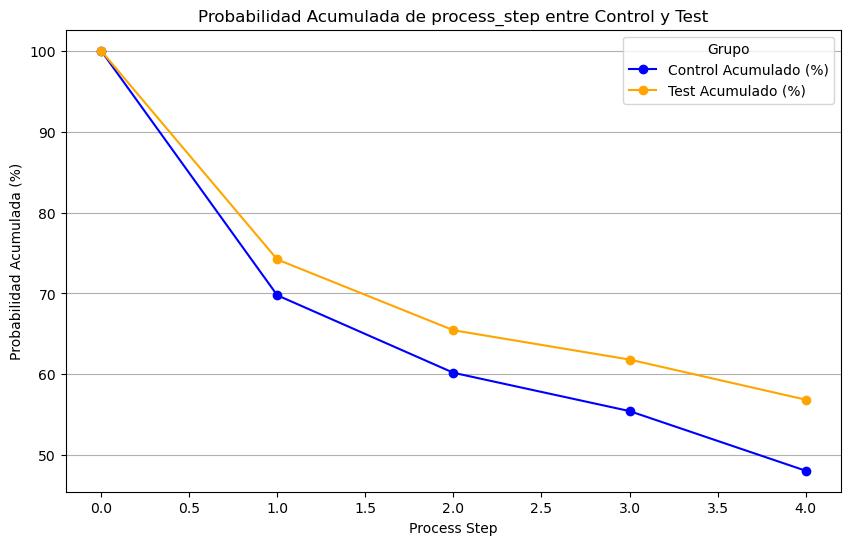

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_control y df_test son tus DataFrames con los datos

# Contar y normalizar las ocurrencias de process_step en cada DataFrame
control_counts = df_control['process_step'].value_counts(normalize=True).sort_index() * 100
test_counts = df_test['process_step'].value_counts(normalize=True).sort_index() * 100

# Crear un DataFrame para facilitar la comparación
counts_df = pd.DataFrame({'Control (%)': control_counts, 'Test (%)': test_counts})

# Invertir el orden de los índices para calcular correctamente la probabilidad acumulada desde el paso 0
counts_df = counts_df[::-1]

# Calcular la probabilidad acumulada
counts_df['Control Acumulado (%)'] = counts_df['Control (%)'].cumsum()
counts_df['Test Acumulado (%)'] = counts_df['Test (%)'].cumsum()

# Invertir de nuevo para graficar correctamente
counts_df = counts_df[::-1]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(counts_df.index, counts_df['Control Acumulado (%)'], marker='o', label='Control Acumulado (%)', color='blue')
plt.plot(counts_df.index, counts_df['Test Acumulado (%)'], marker='o', label='Test Acumulado (%)', color='orange')
plt.title('Probabilidad Acumulada de process_step entre Control y Test')
plt.xlabel('Process Step')
plt.ylabel('Probabilidad Acumulada (%)')
plt.xticks(rotation=0)
plt.legend(title='Grupo')
plt.grid(axis='y')
plt.show()


In [36]:
df_all_no_duplicates.describe

<bound method NDFrame.describe of         client_id  clnt_tenure_mnth  clnt_age gendr  num_accts        bal  \
0          836976              73.0      60.5     U        2.0   45105.30   
11        2304905              94.0      58.0     U        2.0  110860.30   
17        1439522              64.0      32.0     U        2.0   52467.79   
22        1562045             198.0      49.0     M        2.0   67454.65   
23        5126305             145.0      33.0     F        2.0  103671.75   
...           ...               ...       ...   ...        ...        ...   
321129    6007167             301.0      49.5     M        2.0   64521.22   
321140     501496             281.0      35.0     F        2.0   32529.34   
321145    9932367             280.0      57.0     F        2.0   94466.55   
321174    5826160             249.0      56.5     F        2.0   44837.16   
321184    8739285             229.0      69.5     F        2.0   44994.24   

        calls_6_mnth  logons_6_mnth      

In [37]:
df_all_no_duplicates.columns

Index(['client_id', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts',
       'bal', 'calls_6_mnth', 'logons_6_mnth', 'visitor_id', 'visit_id',
       'process_step', 'date_time', 'variation'],
      dtype='object')

In [41]:
df_all_no_duplicates

,client_id,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation,finalizo_compra
0,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:51:13,1,True
11,2304905,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,4,2017-05-21 11:07:16,0,True
17,1439522,64.0,32.0,U,2.0,52467.79,6.0,9.0,245908175_84333642537,898099666_87299892721_263146,3,2017-04-06 09:29:59,1,False
22,1562045,198.0,49.0,M,2.0,67454.65,3.0,6.0,391202328_71710993352,71954691_44810191073_495385,0,2017-04-06 19:03:46,1,False
23,5126305,145.0,33.0,F,2.0,103671.75,0.0,3.0,432077852_35036160885,942996157_39527225999_589383,0,2017-06-14 14:22:31,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321129,6007167,301.0,49.5,M,2.0,64521.22,2.0,5.0,823062839_53085900900,885582844_6761379786_431966,4,2017-04-02 21:01:02,1,True
321140,501496,281.0,35.0,F,2.0,32529.34,0.0,3.0,151712852_16244301725,540064223_23899933167_391847,4,2017-06-20 16:50:31,1,True
321145,9932367,280.0,57.0,F,2.0,94466.55,6.0,9.0,445698439_1878097775,363679978_29683950783_960618,4,2017-06-01 01:39:16,0,True
321174,5826160,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,842608317_42559400580_37328,4,2017-04-05 13:24:53,1,True


In [48]:
# Filtrar los usuarios que finalizaron la compra (process_step == 4)
df_compras = df_all_no_duplicates[df_all_no_duplicates['process_step'] == 4]

# Agrupar por portal (variation) y calcular la media del saldo (bal) para los que finalizaron la compra
grouped_bal = df_compras.groupby('variation')['bal'].mean().reset_index()

# Renombrar columnas para facilitar la lectura
grouped_bal.columns = ['variation', 'Saldo Promedio (Clientes con Compra)']

# Unir los datos originales con la nueva columna para saber si finalizaron la compra
df_all_no_duplicates = pd.merge(df_all_no_duplicates, grouped_bal, on='variation', how='left')

# Crear una columna que indique si el cliente tiene más o menos que el saldo promedio
df_all_no_duplicates['bal_vs_promedio'] = df_all_no_duplicates['bal'] - df_all_no_duplicates['Saldo Promedio (Clientes con Compra)']
df_all_no_duplicates['comparacion_saldo'] = df_all_no_duplicates['bal_vs_promedio'].apply(lambda x: 'Más que Promedio' if x > 0 else 'Menos que Promedio')

# Visualizar los primeros resultados
print(df_all_no_duplicates[['client_id', 'variation', 'bal', 'comparacion_saldo', 'finalizo_compra']].head())

# Si deseas hacer una tabla resumen para comparar portales
resumen = df_all_no_duplicates.groupby(['variation', 'finalizo_compra']).agg({
    'bal': ['mean', 'median', 'count'],
    'comparacion_saldo': lambda x: x.value_counts().to_dict()
}).reset_index()

# Renombrar las columnas para mayor claridad
resumen.columns = ['Portal', 'Finalizó Compra', 'Saldo Medio', 'Saldo Mediano', 'Número de Usuarios', 'Distribución Saldo']

# Mostrar la tabla resumen
print(resumen)



   client_id  variation        bal   comparacion_saldo  finalizo_compra
0     836976          1   45105.30  Menos que Promedio             True
1    2304905          0  110860.30    Más que Promedio             True
2    1439522          1   52467.79  Menos que Promedio            False
3    1562045          1   67454.65    Más que Promedio            False
4    5126305          0  103671.75    Más que Promedio            False
   Portal  Finalizó Compra   Saldo Medio  Saldo Mediano  Número de Usuarios  \
0       0            False  69429.187849       53521.90                7911   
1       0             True  64782.662126       49673.89                8302   
2       1            False  68840.858456       52579.36                7648   
3       1             True  65590.088792       49809.53               11070   

                                  Distribución Saldo  
0  {'Menos que Promedio': 4816, 'Más que Promedio...  
1  {'Menos que Promedio': 5461, 'Más que Promedio...  
2  {'Me

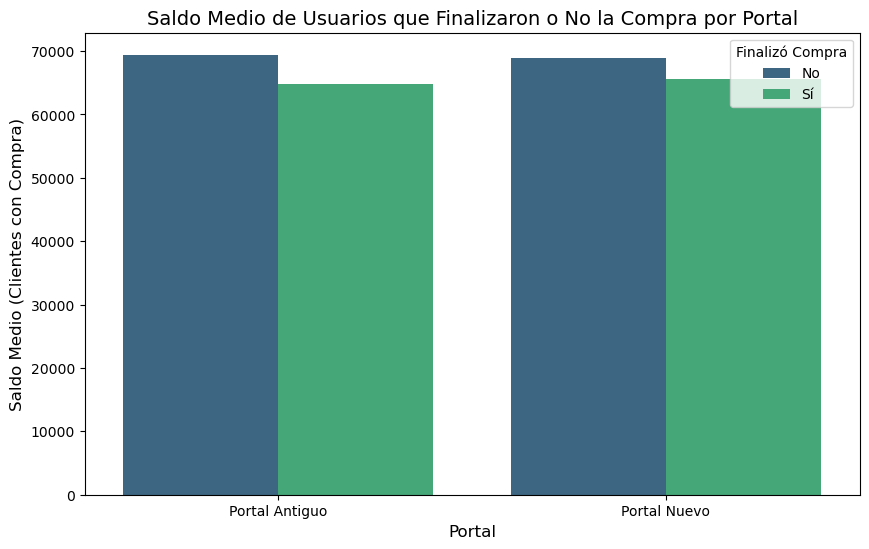

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el DataFrame con la información del resumen
resumen = df_all_no_duplicates.groupby(['variation', 'finalizo_compra']).agg({
    'bal': ['mean', 'median', 'count']
}).reset_index()

# Renombrar las columnas para mayor claridad
resumen.columns = ['Portal', 'Finalizó Compra', 'Saldo Medio', 'Saldo Mediano', 'Número de Usuarios']

# Convertir 'Portal' a etiquetas más descriptivas
resumen['Portal'] = resumen['Portal'].replace({0: 'Portal Antiguo', 1: 'Portal Nuevo'})

# Convertir 'Finalizó Compra' a etiquetas más legibles
resumen['Finalizó Compra'] = resumen['Finalizó Compra'].replace({True: 'Sí', False: 'No'})

# Gráfico de barras para el Saldo Medio en cada portal, separando si finalizaron la compra o no
plt.figure(figsize=(10, 6))
sns.barplot(data=resumen, x='Portal', y='Saldo Medio', hue='Finalizó Compra', palette='viridis')

# Títulos y etiquetas
plt.title('Saldo Medio de Usuarios que Finalizaron o No la Compra por Portal', fontsize=14)
plt.xlabel('Portal', fontsize=12)
plt.ylabel('Saldo Medio (Clientes con Compra)', fontsize=12)

# Mostrar el gráfico
plt.show()


In [51]:
resumen

,Portal,Finalizó Compra,Saldo Medio,Saldo Mediano,Número de Usuarios
0,Portal Antiguo,No,69429.187849,53521.90,7911
1,Portal Antiguo,Sí,64782.662126,49673.89,8302
2,Portal Nuevo,No,68840.858456,52579.36,7648
3,Portal Nuevo,Sí,65590.088792,49809.53,11070
